# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load the Churn Data

In [3]:
def normalize(col):
    return (col - np.mean(col)) / np.std(col)

def load_data(filename):
    df = pd.read_csv(filename)

    # Drop the state and phone columns
    del df['State']
    del df['Area Code']
    del df['Phone']

    # Binarize remaining variables
    df["Int'l Plan"] = (df["Int\'l Plan"] == 'yes').astype(int)
    df["VMail Plan"] = (df["VMail Plan"] == 'yes').astype(int)
    df['Churn?'] = (df['Churn?'] == 'True.').astype(int)

    # Normalize columns so that cosine similarity is the same as correlation
    arr = np.apply_along_axis(normalize, 1, df.values)
    return arr, df.columns, df

arr, cols, df = load_data('data/churn.csv')

In [5]:
df.head(100)

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,104,0,0,0,278.4,106,47.33,81.0,113,6.89,163.2,137,7.34,9.8,5,2.65,1,0
96,73,0,0,0,160.1,110,27.22,213.3,72,18.13,174.1,72,7.83,13.0,4,3.51,0,0
97,99,0,0,0,198.2,87,33.69,207.3,76,17.62,190.9,113,8.59,8.7,3,2.35,4,0
98,120,0,0,0,212.1,131,36.06,209.4,104,17.80,167.2,96,7.52,5.3,5,1.43,1,1


## Perform hierarchical clustering on observations (columns)

/Users/drewthayer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


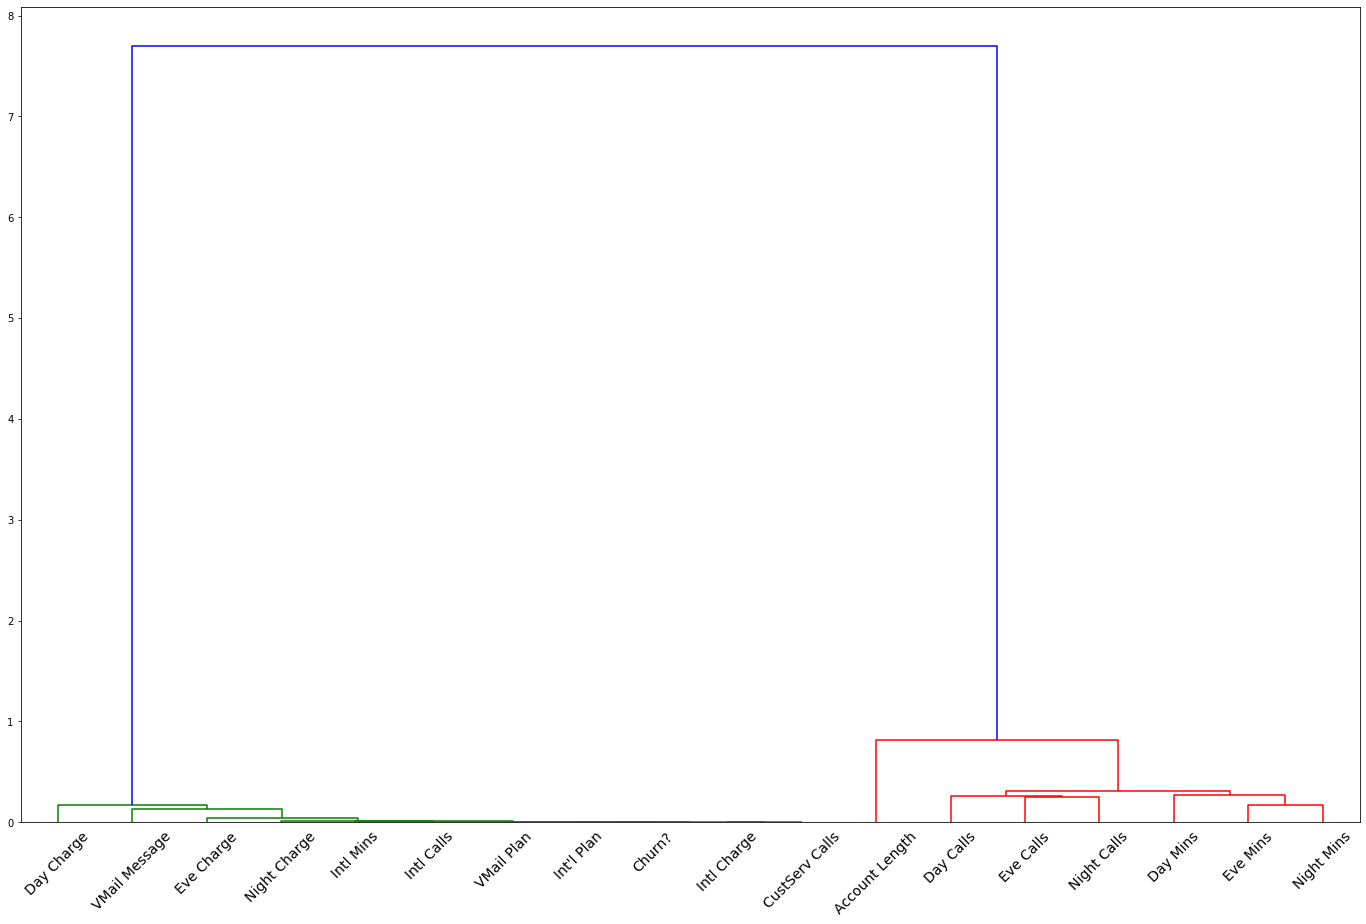

In [9]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Create distance matrix on columns using cosine distance
dist = squareform(pdist(arr.transpose(), 'cosine'))
clust = linkage(dist, method='average')

fig, ax = plt.subplots(figsize=(24,15))
_ = dendrogram(clust, ax=ax, labels=cols)
_ = plt.xticks(fontsize=14, rotation=45)